In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
# Sample document
sample_document = """The beauty of nature never fails to inspire awe. 
From the majestic mountains to the serene lakes and lush forests, nature's wonders are endless.
The gentle rustle of leaves in the wind, the vibrant colors of blooming flowers, and the soothing 
sound of flowing rivers create a sense of tranquility and harmony. Nature provides us with moments 
of peace and reflection, reminding us of the interconnectedness of all living things. Whether it's 
watching a sunrise over the ocean or stargazing under the night sky, being immersed in nature rejuvenates
the soul and fills the heart with joy."""
# Print the results
print("Original Document:")
print(sample_document)

Original Document:
The beauty of nature never fails to inspire awe. 
From the majestic mountains to the serene lakes and lush forests, nature's wonders are endless.
The gentle rustle of leaves in the wind, the vibrant colors of blooming flowers, and the soothing 
sound of flowing rivers create a sense of tranquility and harmony. Nature provides us with moments 
of peace and reflection, reminding us of the interconnectedness of all living things. Whether it's 
watching a sunrise over the ocean or stargazing under the night sky, being immersed in nature rejuvenates
the soul and fills the heart with joy.


In [30]:
text="A boy and a girl were playing together. The boy had a collection of marbles. The girl has some sweets with her. The boy told the girl that he would give her all his marbles in exchange for the sweets with her. The girl agreed.The boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles. The girl gave him all her sweets as she promised. That night the girl slept peacefully. But the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her."
text=text.lower()
text

'a boy and a girl were playing together. the boy had a collection of marbles. the girl has some sweets with her. the boy told the girl that he would give her all his marbles in exchange for the sweets with her. the girl agreed.the boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles. the girl gave him all her sweets as she promised. that night the girl slept peacefully. but the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her.'

In [3]:
# Tokenization
tokens = word_tokenize(sample_document)
print("\nAfter Preprocessing:")
print("Tokenization:", tokens)


After Preprocessing:
Tokenization: ['The', 'beauty', 'of', 'nature', 'never', 'fails', 'to', 'inspire', 'awe', '.', 'From', 'the', 'majestic', 'mountains', 'to', 'the', 'serene', 'lakes', 'and', 'lush', 'forests', ',', 'nature', "'s", 'wonders', 'are', 'endless', '.', 'The', 'gentle', 'rustle', 'of', 'leaves', 'in', 'the', 'wind', ',', 'the', 'vibrant', 'colors', 'of', 'blooming', 'flowers', ',', 'and', 'the', 'soothing', 'sound', 'of', 'flowing', 'rivers', 'create', 'a', 'sense', 'of', 'tranquility', 'and', 'harmony', '.', 'Nature', 'provides', 'us', 'with', 'moments', 'of', 'peace', 'and', 'reflection', ',', 'reminding', 'us', 'of', 'the', 'interconnectedness', 'of', 'all', 'living', 'things', '.', 'Whether', 'it', "'s", 'watching', 'a', 'sunrise', 'over', 'the', 'ocean', 'or', 'stargazing', 'under', 'the', 'night', 'sky', ',', 'being', 'immersed', 'in', 'nature', 'rejuvenates', 'the', 'soul', 'and', 'fills', 'the', 'heart', 'with', 'joy', '.']


In [6]:
# POS Tagging
pos_tags = pos_tag(tokens)
print("POS Tagging:", pos_tags)

POS Tagging: [('The', 'DT'), ('beauty', 'NN'), ('of', 'IN'), ('nature', 'NN'), ('never', 'RB'), ('fails', 'VBZ'), ('to', 'TO'), ('inspire', 'VB'), ('awe', 'NN'), ('.', '.'), ('From', 'IN'), ('the', 'DT'), ('majestic', 'JJ'), ('mountains', 'NNS'), ('to', 'TO'), ('the', 'DT'), ('serene', 'JJ'), ('lakes', 'NNS'), ('and', 'CC'), ('lush', 'JJ'), ('forests', 'NNS'), (',', ','), ('nature', 'NN'), ("'s", 'POS'), ('wonders', 'NNS'), ('are', 'VBP'), ('endless', 'JJ'), ('.', '.'), ('The', 'DT'), ('gentle', 'JJ'), ('rustle', 'NN'), ('of', 'IN'), ('leaves', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('wind', 'NN'), (',', ','), ('the', 'DT'), ('vibrant', 'JJ'), ('colors', 'NNS'), ('of', 'IN'), ('blooming', 'VBG'), ('flowers', 'NNS'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('soothing', 'VBG'), ('sound', 'NN'), ('of', 'IN'), ('flowing', 'VBG'), ('rivers', 'NNS'), ('create', 'VBP'), ('a', 'DT'), ('sense', 'NN'), ('of', 'IN'), ('tranquility', 'NN'), ('and', 'CC'), ('harmony', 'NN'), ('.', '.'), ('Nature', 

In [33]:
stopwords.words("English")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
# Stopwords Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

print("Stopwords Removal:", filtered_tokens)

Stopwords Removal: ['beauty', 'nature', 'never', 'fails', 'inspire', 'awe', '.', 'majestic', 'mountains', 'serene', 'lakes', 'lush', 'forests', ',', 'nature', "'s", 'wonders', 'endless', '.', 'gentle', 'rustle', 'leaves', 'wind', ',', 'vibrant', 'colors', 'blooming', 'flowers', ',', 'soothing', 'sound', 'flowing', 'rivers', 'create', 'sense', 'tranquility', 'harmony', '.', 'Nature', 'provides', 'us', 'moments', 'peace', 'reflection', ',', 'reminding', 'us', 'interconnectedness', 'living', 'things', '.', 'Whether', "'s", 'watching', 'sunrise', 'ocean', 'stargazing', 'night', 'sky', ',', 'immersed', 'nature', 'rejuvenates', 'soul', 'fills', 'heart', 'joy', '.']


In [8]:
# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print("Stemming:", stemmed_tokens)

Stemming: ['beauti', 'natur', 'never', 'fail', 'inspir', 'awe', '.', 'majest', 'mountain', 'seren', 'lake', 'lush', 'forest', ',', 'natur', "'s", 'wonder', 'endless', '.', 'gentl', 'rustl', 'leav', 'wind', ',', 'vibrant', 'color', 'bloom', 'flower', ',', 'sooth', 'sound', 'flow', 'river', 'creat', 'sens', 'tranquil', 'harmoni', '.', 'natur', 'provid', 'us', 'moment', 'peac', 'reflect', ',', 'remind', 'us', 'interconnected', 'live', 'thing', '.', 'whether', "'s", 'watch', 'sunris', 'ocean', 'stargaz', 'night', 'sky', ',', 'immers', 'natur', 'rejuven', 'soul', 'fill', 'heart', 'joy', '.']


In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [9]:

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("Lemmatization:", lemmatized_tokens)

Lemmatization: ['beauty', 'nature', 'never', 'fails', 'inspire', 'awe', '.', 'majestic', 'mountain', 'serene', 'lake', 'lush', 'forest', ',', 'nature', "'s", 'wonder', 'endless', '.', 'gentle', 'rustle', 'leaf', 'wind', ',', 'vibrant', 'color', 'blooming', 'flower', ',', 'soothing', 'sound', 'flowing', 'river', 'create', 'sense', 'tranquility', 'harmony', '.', 'Nature', 'provides', 'u', 'moment', 'peace', 'reflection', ',', 'reminding', 'u', 'interconnectedness', 'living', 'thing', '.', 'Whether', "'s", 'watching', 'sunrise', 'ocean', 'stargazing', 'night', 'sky', ',', 'immersed', 'nature', 'rejuvenates', 'soul', 'fill', 'heart', 'joy', '.']


In [26]:
# Joining tokens back to text
cleaned_text = ' '.join(lemmatized_tokens)
print(cleaned_text)

beauty nature never fails inspire awe . majestic mountain serene lake lush forest , nature 's wonder endless . gentle rustle leaf wind , vibrant color blooming flower , soothing sound flowing river create sense tranquility harmony . Nature provides u moment peace reflection , reminding u interconnectedness living thing . Whether 's watching sunrise ocean stargazing night sky , immersed nature rejuvenates soul fill heart joy .


In [15]:
# Remove punctuation marks
words_without_punctuation = []
for word in lemmatized_tokens:
    if word.isalpha():
        words_without_punctuation.append(word)
print(words_without_punctuation)

['beauty', 'nature', 'never', 'fails', 'inspire', 'awe', 'majestic', 'mountain', 'serene', 'lake', 'lush', 'forest', 'nature', 'wonder', 'endless', 'gentle', 'rustle', 'leaf', 'wind', 'vibrant', 'color', 'blooming', 'flower', 'soothing', 'sound', 'flowing', 'river', 'create', 'sense', 'tranquility', 'harmony', 'Nature', 'provides', 'u', 'moment', 'peace', 'reflection', 'reminding', 'u', 'interconnectedness', 'living', 'thing', 'Whether', 'watching', 'sunrise', 'ocean', 'stargazing', 'night', 'sky', 'immersed', 'nature', 'rejuvenates', 'soul', 'fill', 'heart', 'joy']


[('nature', 3), ('u', 2), ('beauty', 1), ('never', 1), ('fails', 1), ('inspire', 1), ('awe', 1), ('majestic', 1), ('mountain', 1), ('serene', 1)]


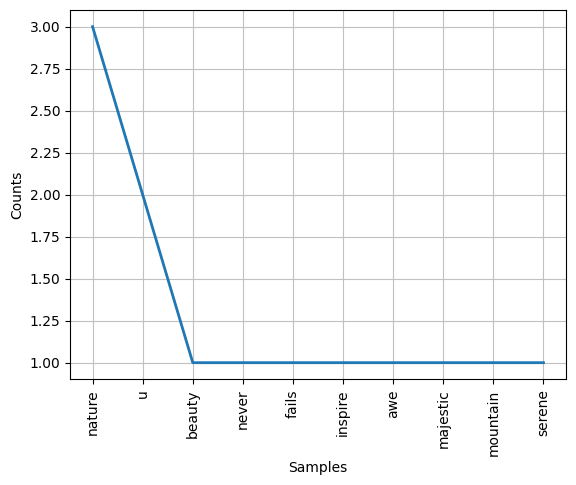

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
# counting the word occurrence using FreqDist library
from nltk import FreqDist
freq = FreqDist(words_without_punctuation)
print(freq.most_common(10))

#plot the frequency of words
freq.plot(10)


<function matplotlib.pyplot.show(close=None, block=None)>

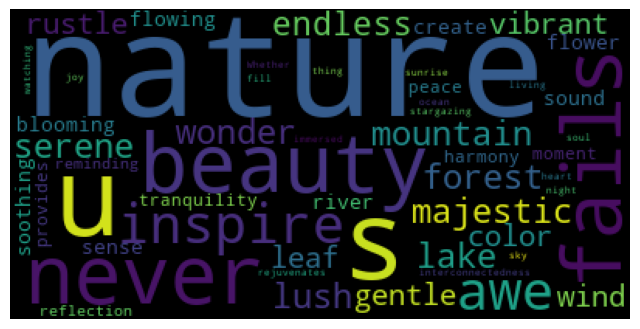

In [25]:
#plotting the wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(cleaned_text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

In [18]:

# TF-IDF Calculation
tfidf_vectorizer = TfidfVectorizer()
tfidf_representation = tfidf_vectorizer.fit_transform([cleaned_text])
print("\nTF-IDF Representation:")
print(tfidf_representation.toarray())


TF-IDF Representation:
[[0.12309149 0.12309149 0.12309149 0.12309149 0.12309149 0.12309149
  0.12309149 0.12309149 0.12309149 0.12309149 0.12309149 0.12309149
  0.12309149 0.12309149 0.12309149 0.12309149 0.12309149 0.12309149
  0.12309149 0.12309149 0.12309149 0.12309149 0.12309149 0.12309149
  0.12309149 0.49236596 0.12309149 0.12309149 0.12309149 0.12309149
  0.12309149 0.12309149 0.12309149 0.12309149 0.12309149 0.12309149
  0.12309149 0.12309149 0.12309149 0.12309149 0.12309149 0.12309149
  0.12309149 0.12309149 0.12309149 0.12309149 0.12309149 0.12309149
  0.12309149 0.12309149 0.12309149]]
